## Introductino
In this project we will be looking at data from the stock market, particularly some technology stocks. We will use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method.



### Questions:
1.) What was the change in price of the stock over time?  
2.) What was the daily return of the stock on average?  
3.) What was the moving average of the various stocks?  
4.) What was the correlation between different stocks' closing prices?  
4.) What was the correlation between different stocks' daily returns?  
5.) How much value do we put at risk by investing in a particular stock?  
6.) How can we attempt to predict future stock behavior?

In [1]:
import pandas as pd 
from pandas import Series, DataFrame
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
from pandas_datareader.data import DataReader
from datetime import datetime

In [3]:
from __future__ import division

### Import Data

In [4]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [5]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-14,151.270004,149.220001,150.850006,150.000000,32439200.0,147.779602
2019-01-15,153.389999,150.050003,150.270004,153.070007,28710900.0,150.804169
2019-01-16,155.880005,153.000000,153.080002,154.940002,30569700.0,152.646484
2019-01-17,157.660004,153.259995,154.199997,155.860001,29821200.0,153.552872
2019-01-18,157.880005,155.979996,157.500000,156.820007,33751000.0,154.498657


In [6]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,214.307570,210.707291,212.297609,212.721793,2.753448e+07,211.548579
std,36.283851,35.997278,36.031948,36.359736,9.692373e+06,37.013864
min,151.270004,149.220001,150.270004,150.000000,1.136200e+07,147.779602
25%,189.919998,185.970001,188.030006,188.690002,2.095990e+07,186.733742
50%,205.869995,202.520004,204.000000,204.160004,2.587330e+07,202.366638
75%,232.840004,229.805000,230.439995,232.229996,3.200345e+07,231.534866
max,312.670013,308.250000,310.600006,310.329987,6.928140e+07,310.329987


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2019-01-14 to 2020-01-10
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null float64
Adj Close    251 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


### Basic Analysis of Stock Information
In this section we'll handle requesting stock information with pandas, and analyze basic attributes of a stock.

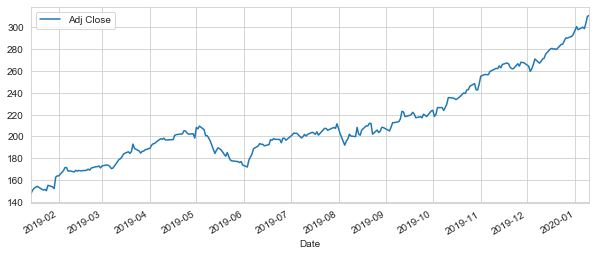

In [8]:
# historical view of the closing price
AAPL['Adj Close'].plot(legend=True, figsize = (10,4))

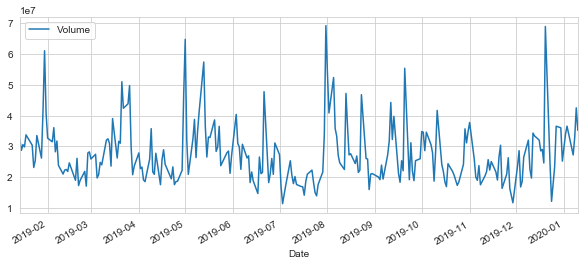

In [9]:
# plot the total volume of stock being traded each day over the past year
AAPL['Volume'].plot(legend = True, figsize = (10,4))

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

In [10]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = 'MA for %s days'%(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

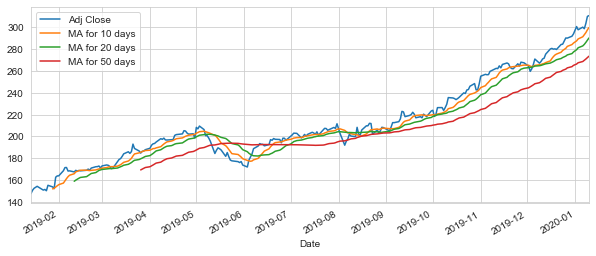

In [11]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize = (10,4))

### Daily return Analysis
We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value.

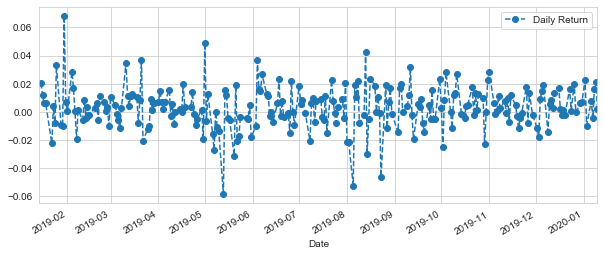

In [12]:
# use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# Then plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle = '--',marker = 'o')

then we get an overall look at the average daily return using a histogram and use seaborn to create both a histogram and kde plot on the same figure.

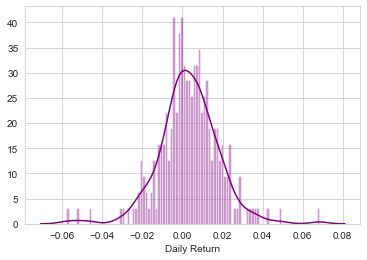

In [13]:
# use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color = 'purple')

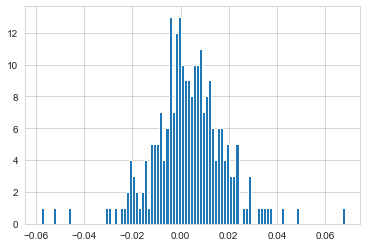

In [14]:
AAPL['Daily Return'].hist(bins=100)

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [15]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-01-14,147.779602,1044.689941,100.563072,1617.209961
2019-01-15,150.804169,1077.150024,103.479950,1674.560059
2019-01-16,152.646484,1080.969971,103.844551,1683.780029
2019-01-17,153.552872,1089.900024,104.573769,1693.219971
2019-01-18,154.498657,1098.260010,106.140602,1696.199951


In [16]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-01-14,NaN,NaN,NaN,NaN
2019-01-15,0.020467,0.031071,0.029005,0.035462
2019-01-16,0.012217,0.003546,0.003523,0.005506
2019-01-17,0.005938,0.008261,0.007022,0.005606
2019-01-18,0.006159,0.007670,0.014983,0.001760


##### compare the daily percentage return of two stocks to check how correlated.
1. Comparing Google to itself

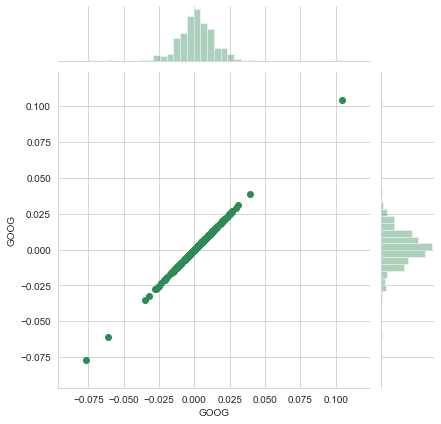

In [17]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color = 'seagreen')

a perfectly linear relationship
2. Comparing Google and Microsoft

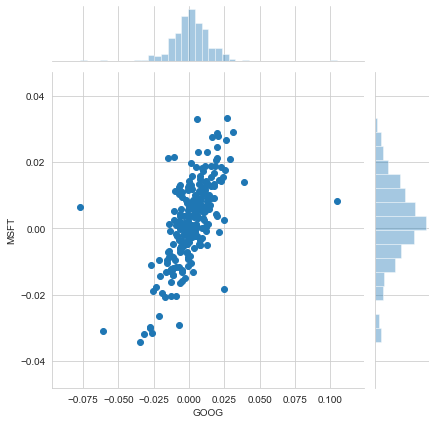

In [18]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

strong correlated, about 0.8

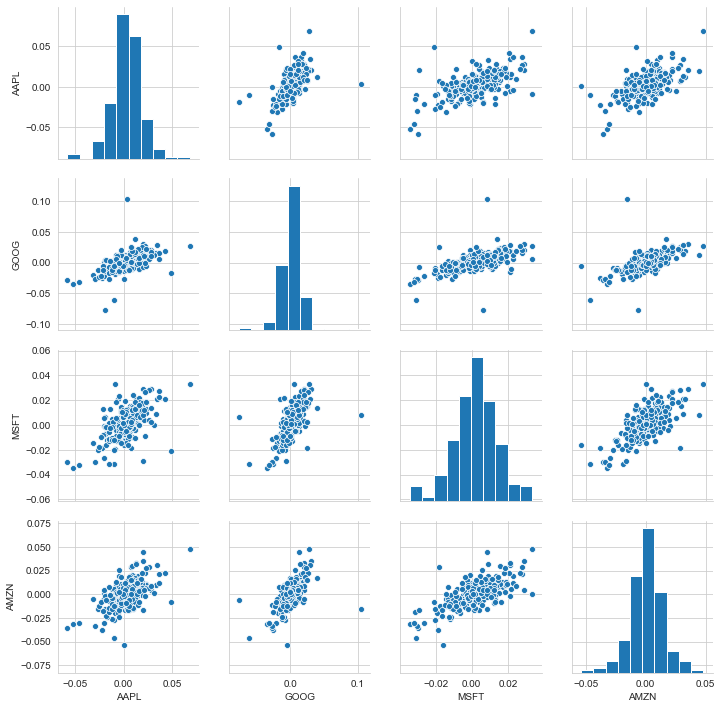

In [19]:
# call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. 

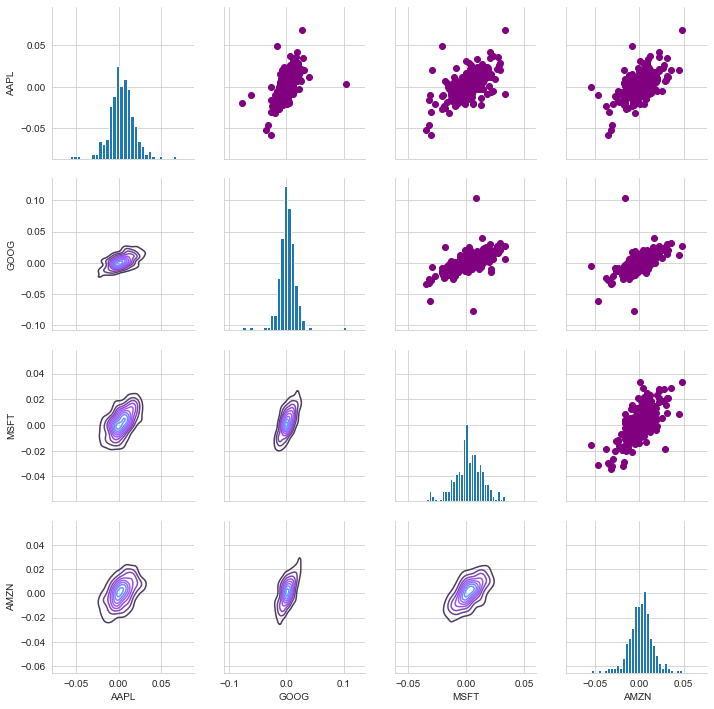

In [20]:
# use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, 
# the upper triangle, and the lower triangle.
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color = 'purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

Analyzed the correlation of the closing prices using this exact same technique.

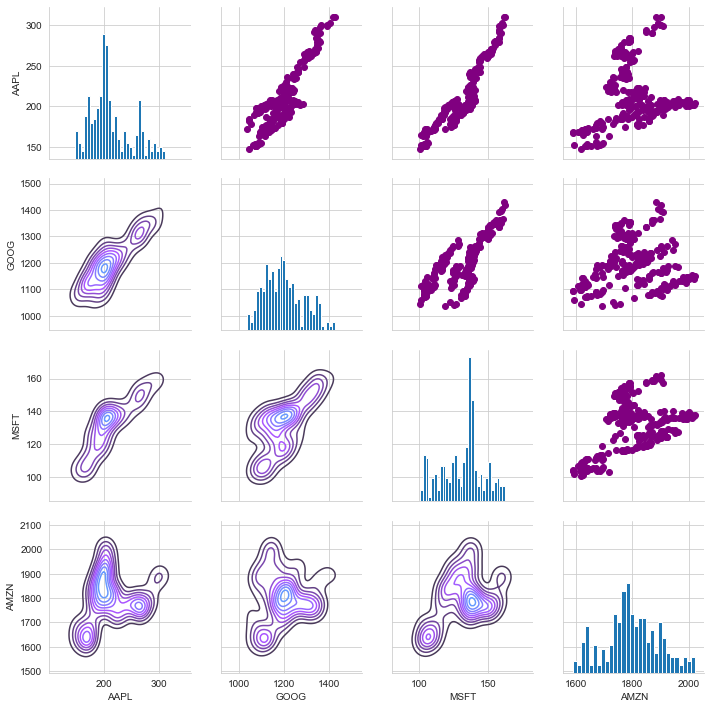

In [21]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter, color = 'purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.  
Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values.

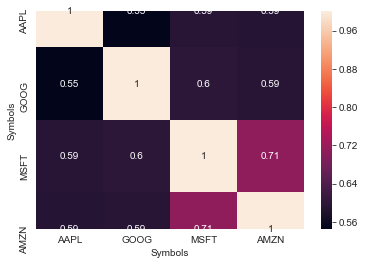

In [22]:
corr = tech_rets.dropna().corr()
sns.heatmap(corr,annot=True)

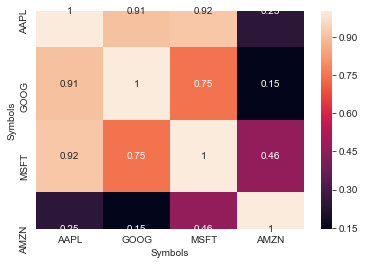

In [23]:
corr = closing_df.corr()
sns.heatmap(corr,annot=True)

### Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

In [24]:
# defining a new DataFrame as a clenaed version of the orignal tech_rets DataFrame
rets = tech_rets.dropna()

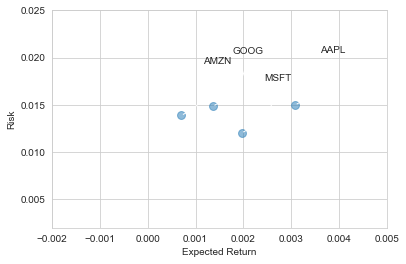

In [41]:
area = np.pi*20
plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')
plt.ylim([0.002,0.025])
plt.xlim([-0.002,0.005])
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

Apple is the best stock (strong expected return with lower risk)

### Value at Risk
Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk.

#### Value at risk using the "bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns.

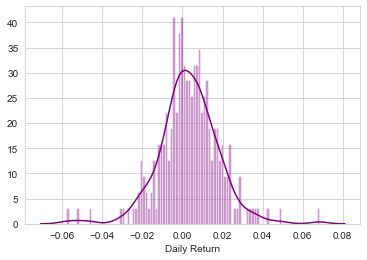

In [42]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [43]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-01-15,0.020467,0.031071,0.029005,0.035462
2019-01-16,0.012217,0.003546,0.003523,0.005506
2019-01-17,0.005938,0.008261,0.007022,0.005606
2019-01-18,0.006159,0.007670,0.014983,0.001760
2019-01-22,-0.022446,-0.025258,-0.018847,-0.037749


In [44]:
# The 0.05 empirical quantile of daily returns of AAPL
rets['AAPL'].quantile(0.05)

-0.020549927655758415

The 0.05 empirical quantile of daily returns is at -0.0205. That means that with 95% confidence, our worst daily loss will not exceed 2.05%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.0205 * 1,000,000 = $20,500.

In [45]:
# The 0.05 empirical quantile of daily returns of GOOG
rets['GOOG'].quantile(0.05)

-0.01972131643623605

The 0.05 empirical quantile of daily returns is at -0.0197. That means that with 95% confidence, our worst daily loss will not exceed 1.97%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.0197 * 1,000,000 = $19,700.

In [47]:
# The 0.05 empirical quantile of daily returns of MSFT
rets['MSFT'].quantile(0.05)

-0.018614547107649242

The 0.05 empirical quantile of daily returns is at -0.0186. That means that with 95% confidence, our worst daily loss will not exceed 1.86%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.0186 * 1,000,000 = $18,600

In [48]:
# The 0.05 empirical quantile of daily returns of AMZN
rets['AMZN'].quantile(0.05)

-0.021589652322481813

The 0.05 empirical quantile of daily returns is at -0.0216. That means that with 95% confidence, our worst daily loss will not exceed 2.16%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.0216 * 1,000,000 = $21,600

#### Value at Risk using the Monte Carlo method

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.  
<br/>   
We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.  
<br/>   
This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.  
<br />  
The equation for geometric Browninan motion is given by the following equation:  
$\frac{\Delta S}{S} = \mu\Delta t + \sigma\epsilon\sqrt{\Delta t}$  
<br />  
Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.  

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.  
$\Delta S = S(\mu\Delta t + \sigma\epsilon\sqrt{\Delta t})$  

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.


In [49]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

Next, we will create a function that takes in the starting price and number of days, and uses teh sigma and mu we already calculated form out daily returns

In [53]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

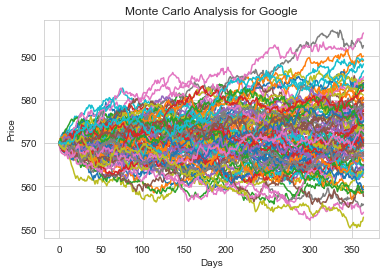

In [54]:
# Get start price from GOOG.head()
start_price = 569.85

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [56]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];


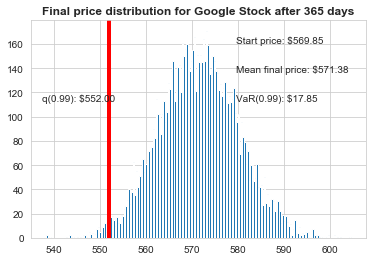

In [57]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $17.85 for every investment of 569.85 (the price of one inital google stock).

This basically menas for every initial stock you purchase your putting about $17.85 at risk 99% of the time from our Monte Carlo Simulation.